In [16]:
import pandas as pd
import numpy as np

test = pd.read_csv('../data/raw/test.csv')
test.head()

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb
0,137142,CADILUXE,MID-SIZE,3.6,NaN,AS8,X,6.40 km/L,1.77 L/100 km,25.04 MPG (AS)
1,137143,FOLD,VAN - PASSENGER,3.7,6.0,AS6,X,21.11 L/100km,14.38 liters per 100 km,5.53 km per L
2,137144,MITSU,SUV - SMALL,6.0,NaN,AV6,X,9.60 MPG (AS),27.45 mpg Imp.,12.99 MPG (AS)
3,137145,LECUS,MID-SIZE,4.6,NaN,AS8,Z,1.68 L/10km,6.29 km/L,16.42 L/100km
4,137146,BMV,SUV - STANDARD,4.4,8.0,AS8,Z,5.65 MPG (AS),14.75 mpg Imp.,31.52 L/100km


In [112]:
test.shape

(58776, 10)

<Axes: >

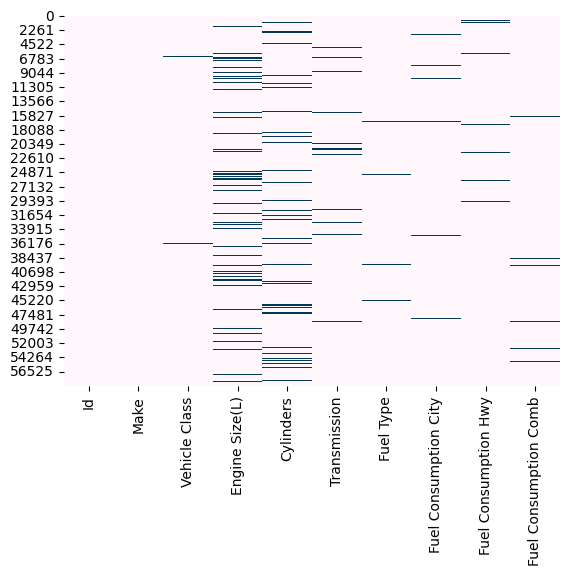

In [113]:
import seaborn as sns
sns.heatmap(test.isnull(), cbar=False, cmap='PuBu')

In [114]:
sum_null = test.isnull().sum()
count_null = test.isnull().count()

total = sum_null.sort_values(ascending=False)
percent = sum_null/count_null.sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(10)

,Total,Percent
Engine Size(L),7239,0.123163
Cylinders,5954,0.101300
Transmission,1155,0.019651
Fuel Consumption Comb,1135,0.019311
Fuel Consumption City,1047,0.017813
Fuel Consumption Hwy,995,0.016929
Fuel Type,770,0.013101
Vehicle Class,533,0.009068
Id,0,0.000000
Make,0,0.000000


In [17]:
# Fill missing values dari kolom numerik dengan nilai mean
test['Engine Size(L)'] = pd.to_numeric(test['Engine Size(L)'], errors='coerce')
test.shape
med_val = test['Engine Size(L)'].mean()
test['Engine Size(L)'].fillna(med_val, inplace=True)

test['Cylinders'] = pd.to_numeric(test['Cylinders'], errors='coerce')
med_val = test['Cylinders'].mean()
test['Cylinders'].fillna(med_val, inplace=True)

In [18]:
# Split the column into 'Number' and 'Unit' based on the pattern
test_fuel_city = test['Fuel Consumption City'].str.extract(r'(?P<number>[\d.]+)\s*(?P<unit>.*)')
test_fuel_city['number'] = pd.to_numeric(test_fuel_city['number'], errors='coerce')

test_fuel_Hwy = test['Fuel Consumption Hwy'].str.extract(r'(?P<number>[\d.]+)\s*(?P<unit>.*)')
test_fuel_Hwy['number'] = pd.to_numeric(test_fuel_Hwy['number'], errors='coerce')

test_fuel_Comb = test['Fuel Consumption Comb'].str.extract(r'(?P<number>[\d.]+)\s*(?P<unit>.*)')
test_fuel_Comb['number'] = pd.to_numeric(test_fuel_Comb['number'], errors='coerce')

print(f'Fuel City: {test_fuel_city.unit.unique()}')
print(f'Fuel Hwy: {test_fuel_Hwy.unit.unique()}')
print(f'Fuel Comb: {test_fuel_Comb.unit.unique()}')

Fuel City: ['km/L' 'L/100km' 'MPG (AS)' 'L/10km' 'km per L' 'mpg Imp.'
 'liters per 100 km' 'L/100 km' nan '']
Fuel Hwy: ['L/100 km' 'liters per 100 km' 'mpg Imp.' 'km/L' 'MPG (AS)' 'km per L'
 'L/10km' 'L/100km' '' nan]
Fuel Comb: ['MPG (AS)' 'km per L' 'L/100km' 'mpg Imp.' 'L/10km' 'km/L'
 'liters per 100 km' 'L/100 km' '' nan]


In [27]:
convert_factors = {
    'km/L': 100, 
    'km per L': 100,
    'mpg Imp.': 282.480936,
    'MPG (AS)': 235.215, 
    'liters per 100 km': 1,
    'L/100 km': 1,
    'L/100km': 1,
    'L/10km': 10
}

def convert_fuel_consumption(row):
    conversion_factor = convert_factors.get(row['unit'], np.nan)
    number = row['number']

    # Check if the denominator is not zero before performing the division
    result = np.nan
    if conversion_factor != np.nan and number != 0:
        if conversion_factor == 'L/10km':
            result = number * conversion_factor
        else:
            result = conversion_factor / number
            
    return result

# Convert nilai berdasarkan tipe unit
test['Fuel Consumption City (l/100km)'] = test_fuel_city.apply(convert_fuel_consumption, axis=1)
test.drop(columns=['Fuel Consumption City'], inplace=True)

test['Fuel Consumption Hwy (l/100km)'] = test_fuel_Hwy.apply(convert_fuel_consumption, axis=1)
test.drop(columns=['Fuel Consumption Hwy'], inplace=True)

test['Fuel Consumption Comb (l/100km)'] = test_fuel_Comb.apply(convert_fuel_consumption, axis=1)
test.drop(columns=['Fuel Consumption Comb'], inplace=True)

test.isnull().sum()

KeyError: "['Fuel Consumption City'] not found in axis"

In [6]:
import random

test_cleaned = test.copy()

test_cleaned['Engine Size(L)'] = pd.to_numeric(test_cleaned['Engine Size(L)'], errors='coerce')
test_cleaned['Cylinders'] = pd.to_numeric(test_cleaned['Cylinders'], errors='coerce')

fill_prob = 0.3
cols = ['Engine Size(L)', 'Cylinders', 'Vehicle Class', 'Transmission', 'Fuel Type']

for col in cols:
    if random.random() < fill_prob:
        if col in ['Engine Size(L)', 'Cylinders']:
            test_cleaned[col].fillna(test_cleaned[col].mean(), inplace=True)
        else:
            test_cleaned[col].fillna(test_cleaned[col].mode()[0], inplace=True)
    else:
        test_cleaned[col].fillna(test_cleaned[col].mode()[0], inplace=True)

In [26]:
# Fill missing value fuel columns dengan nilai mean
test['Fuel Consumption City (km/l)'].fillna(test['Fuel Consumption City (km/l)'].mean(), inplace=True)
test['Fuel Consumption Hwy (km/l)'].fillna(test['Fuel Consumption Hwy (km/l)'].mean(), inplace=True)
test['Fuel Consumption Comb (km/l)'].fillna(test['Fuel Consumption Comb (km/l)'].mean(), inplace=True)

test.isnull().sum()

KeyError: 'Fuel Consumption City (km/l)'

In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

test_encoded = test_cleaned.copy()

test_encoded['Make'] = label_encoder.fit_transform(test_encoded['Make'])
test_encoded['Vehicle Class'] = label_encoder.fit_transform(test_encoded['Vehicle Class'])
test_encoded['Transmission'] = label_encoder.fit_transform(test_encoded['Transmission'])
test_encoded['Fuel Type'] = label_encoder.fit_transform(test_encoded['Fuel Type'])

test_encoded.dtypes

Id                                   int64
Make                                 int64
Vehicle Class                        int64
Engine Size(L)                     float64
Cylinders                          float64
Transmission                         int64
Fuel Type                            int64
Fuel Consumption City (l/100km)    float64
Fuel Consumption Hwy (l/100km)     float64
Fuel Consumption Comb (l/100km)    float64
dtype: object

In [120]:
# Fill missing value di kolom kategorikal dengan nilai modus
test['Transmission'].fillna(test['Transmission'].mode()[0], inplace=True)
test['Fuel Type'].fillna(test['Fuel Type'].mode()[0], inplace=True)
test['Vehicle Class'].fillna(test['Vehicle Class'].mode()[0], inplace=True)
test['Make'].fillna(test['Make'].mode()[0], inplace=True)

In [13]:
test_subset = test_encoded.drop(columns=['Make', 'Vehicle Class', 'Transmission', 'Id'])

# Calculate IQR
Q1 = test_subset.quantile(0.25)
Q3 = test_subset.quantile(0.75)
IQR = Q3 - Q1

# Identify and replace outliers with the mode
for column in test_subset.columns:
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]

    # Replace outliers with the mode
    test_subset[column] = np.where((test_subset[column] < lower_bound) | (test_subset[column] > upper_bound),
                                   test_subset[column].mode()[0],
                                   test_subset[column])

# Concatenate 'id' and 'make' columns back to the modified DataFrame
modified_test = pd.concat([test_encoded[['Make', 'Vehicle Class', 'Transmission', 'Id']], test_subset], axis=1)

In [14]:
modified_test.dtypes

Make                                 int64
Vehicle Class                        int64
Transmission                         int64
Id                                   int64
Engine Size(L)                     float64
Cylinders                          float64
Fuel Type                            int64
Fuel Consumption City (l/100km)    float64
Fuel Consumption Hwy (l/100km)     float64
Fuel Consumption Comb (l/100km)    float64
dtype: object

In [15]:
# Simpan preprocessed data
import pickle
import os

if not os.path.exists('../data/processed'):
    os.makedirs('../data/processed')

with open('../data/processed/test-processed.pkl', 'wb') as f:
    pickle.dump(modified_test, f)